In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2014-01-01'
end = '2024-06-29'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.692570,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.490559,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.797060,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.332937,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.391901,90036218
...,...,...,...,...,...,...,...
2635,2024-06-24,181.279999,182.080002,180.229996,180.789993,180.789993,18198300
2636,2024-06-25,181.145004,185.750000,181.104996,185.580002,185.580002,18917700
2637,2024-06-26,184.199997,185.929993,183.990005,185.369995,185.369995,13375700
2638,2024-06-27,185.645004,187.500000,185.449997,186.860001,186.860001,13025700


In [6]:
ma_100_days = data.Close.rolling(100).mean()

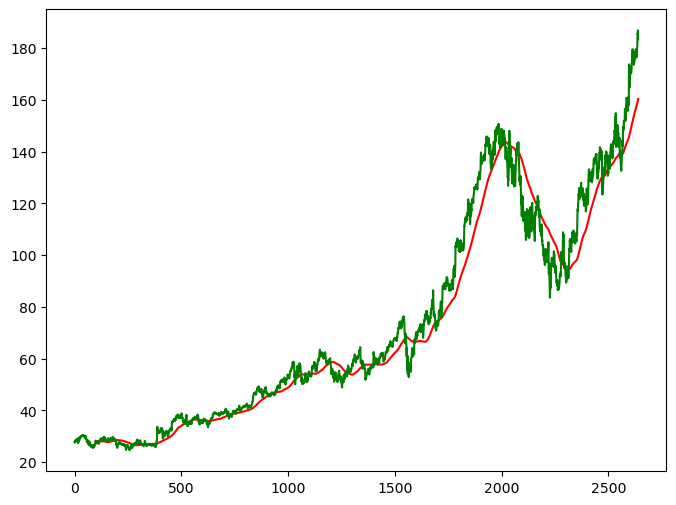

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

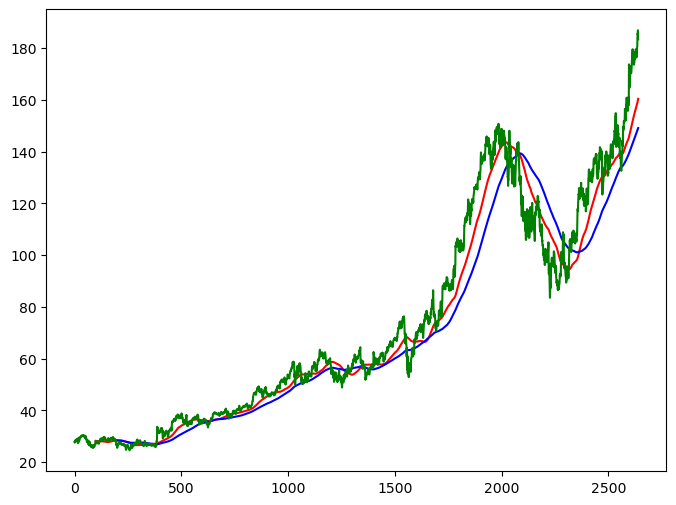

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2112

In [13]:
data_test.shape[0]

528

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\venom\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - loss: 0.0663
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - loss: 0.0067
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - loss: 0.0059
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0048
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - loss: 0.0051
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - loss: 0.0043
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - loss: 0.0050
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 0.0038
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - loss: 0.0041
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - loss: 0.0046
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0039
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0032
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0028
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0033
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [18]:
pas_100_days = data_train.tail(100)

In [19]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [20]:
data_test_scale  =  scaler.fit_transform(data_test)

In [21]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
print(x)
x, y = np.array(x), np.array(y)

[array([[0.60960145],
       [0.60474512],
       [0.59194645],
       [0.59576757],
       [0.58940219],
       [0.52397702],
       [0.52298535],
       [0.51769858],
       [0.53288194],
       [0.5468463 ],
       [0.56261967],
       [0.53827027],
       [0.54461159],
       [0.51079131],
       [0.50461443],
       [0.48385896],
       [0.45082709],
       [0.45353579],
       [0.41835637],
       [0.44258495],
       [0.44143372],
       [0.48175975],
       [0.50506435],
       [0.52615357],
       [0.62442197],
       [0.57231787],
       [0.5758538 ],
       [0.53640325],
       [0.53906354],
       [0.56073332],
       [0.53315753],
       [0.48989074],
       [0.50120929],
       [0.51209739],
       [0.52237113],
       [0.47226955],
       [0.4544597 ],
       [0.44415689],
       [0.42657444],
       [0.47580046],
       [0.49365872],
       [0.49725266],
       [0.4902583 ],
       [0.49590303],
       [0.49161265],
       [0.47046527],
       [0.41573475],
       [0.42

In [27]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step


In [28]:
scale =1/scaler.scale_

In [29]:
y_predict = y_predict*scale

In [30]:
y = y*scale

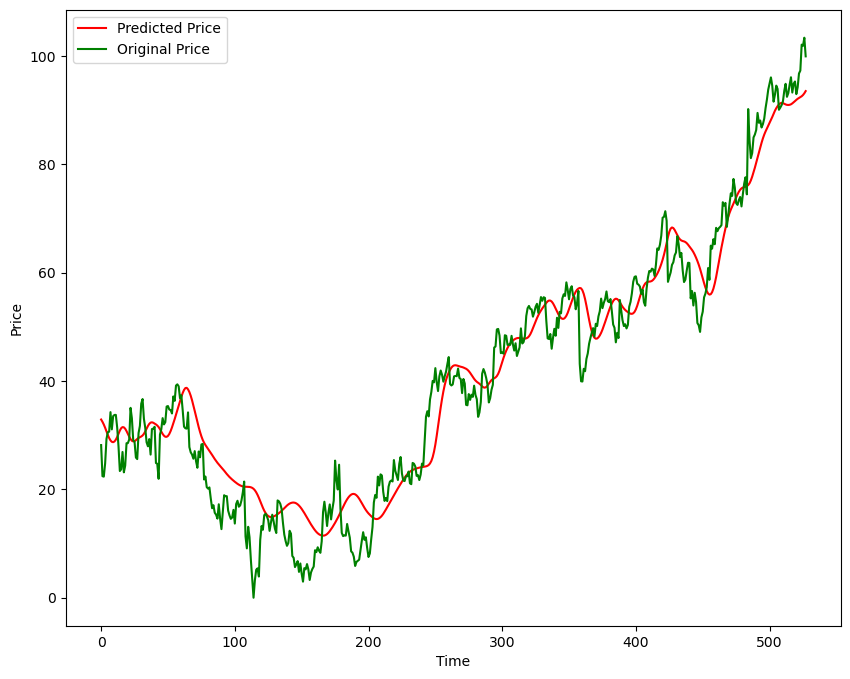

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
model.save('Stock Predictions Model.keras')